# Predicting Divvy's Bike Rental Dataset according to the Weather forecast
The purpose of this project is to predict the most suitable weather collected from Visual Crossing for the bike rental users at Chicago, US. This will help Divvy to be able to shift their locations to different parts of Chicago to continue their bike rental business.

This project will use AutoGluon, a software that trains different kinds of models to solve this problem.
Autogluon will select the best models that can perform well for the training data. We'll use the best model for the project.

There are 3 Python programs that have already produced the `divvy_bike_rental.csv` dataset for you. They run in this order:

1. [Count Divvy Trip Data Per Day](./count_divvy_tripdata_per_day.py)
2. [Combine Visual Crossing Weather Data](./combine_visual_crossing_weather_data.py)
3. [Combine Weather Data with Trip Data](./combine_weatherdata_with_tripdata.py)

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from autogluon.tabular import TabularDataset, TabularPredictor

/opt/anaconda3/envs/ml_base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1: Importing Data
Let's import the `divvy_bike_rental.csv` dataset.

In [2]:
divvy_bike_rental_df = pd.read_csv('divvy_bike_rental.csv')

Now let's visualise the dataset.

In [3]:
divvy_bike_rental_df

datetime  temp   dew  humidity  precip  snowdepth  windgust  \
0     2021-01-01  -0.7  -3.2      82.8   7.045        3.2      52.2   
1     2021-01-02   0.5  -1.7      85.2   0.000        2.1      46.1   
2     2021-01-03  -0.2  -2.4      85.4   1.054        0.8      24.8   
3     2021-01-04  -2.6  -4.3      88.3   0.000        0.8      29.5   
4     2021-01-05   0.2  -2.4      82.4   0.000        0.8      26.6   
...          ...   ...   ...       ...     ...        ...       ...   
1242  2024-05-27  17.9  11.7      68.1   0.215        0.0      42.1   
1243  2024-05-28  16.9  11.5      72.0   3.852        0.0      48.7   
1244  2024-05-29  15.9   7.9      61.9   0.428        0.0      46.1   
1245  2024-05-30  15.3   2.3      44.3   0.000        0.0      29.5   
1246  2024-05-31  20.0   8.0      48.9   0.000        0.0      40.7   

      windspeed  sealevelpressure  cloudcover  visibility  solarradiation  \
0          36.0            1017.7        94.9         8.2            13.8   
1          19.8            1017.8        99.9         9.3            42.5   
2          14.9            1015.8        99.8         9.6            20.6   
3          19.7            1016.2       100.0         6.0            40.7   
4          16.3            1020.2        99.0        11.4            42.6   
...         ...               ...         ...         ...             ...   
1242       27.1            1004.4        93.7        16.0            46.3   
1243       20.0            1013.5        60.9        15.6           125.8   
1244       33.0            1020.7        66.1        15.9           142.6   
1245       20.3            1023.3        24.5        16.0           160.0   
1246       21.4            1021.7        72.4        16.0           134.9   

      solarenergy  uvindex  ride_count  
0             1.1        1        1068  
1             3.7        3        2275  
2             1.7        1        2383  
3             3.4        2        3209  
4             3.6        2        3845  
...           ...      ...         ...  
1242          4.1        2       16815  
1243         10.9        8       15355  
1244         12.4        9       20868  
1245         13.7        9       21156  
1246         11.7        7       25175  

[1247 rows x 15 columns]

In [4]:
divvy_bike_rental_df.describe()

temp          dew     humidity       precip    snowdepth  \
count  1247.000000  1247.000000  1247.000000  1247.000000  1247.000000   
mean     11.549479     4.189575    63.233280     2.117059     0.512029   
std      10.627286     9.934884    12.407938     5.729179     2.036544   
min     -21.000000   -25.700000    31.500000     0.000000     0.000000   
25%       3.200000    -2.850000    54.300000     0.000000     0.000000   
50%      11.300000     3.600000    63.200000     0.000000     0.000000   
75%      21.400000    13.000000    72.300000     1.112500     0.000000   
max      32.500000    25.000000    95.400000    83.239000    20.600000   

          windgust    windspeed  sealevelpressure   cloudcover   visibility  \
count  1246.000000  1247.000000       1247.000000  1247.000000  1247.000000   
mean     43.463724    25.201925       1016.175862    65.310505    14.914675   
std      13.015756     7.254690          7.159470    26.612155     2.162726   
min      11.200000     9.100000        991.400000     0.000000     1.700000   
25%      34.900000    19.800000       1011.600000    45.150000    14.900000   
50%      42.500000    24.300000       1015.800000    69.600000    15.900000   
75%      51.100000    29.300000       1020.600000    89.000000    16.000000   
max     109.100000    57.900000       1038.800000   100.000000    16.000000   

       solarradiation  solarenergy      uvindex    ride_count  
count     1247.000000  1247.000000  1247.000000   1247.000000  
mean        79.371211     6.834804     4.311949  14977.465116  
std         52.081685     4.505790     2.694095   9004.365476  
min          3.000000     0.000000     0.000000    268.000000  
25%         35.900000     3.100000     2.000000   7106.500000  
50%         67.700000     5.800000     4.000000  13726.000000  
75%        120.800000    10.350000     7.000000  23046.500000  
max        238.800000    20.800000    10.000000  37328.000000

In [5]:
divvy_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          1247 non-null   object 
 1   temp              1247 non-null   float64
 2   dew               1247 non-null   float64
 3   humidity          1247 non-null   float64
 4   precip            1247 non-null   float64
 5   snowdepth         1247 non-null   float64
 6   windgust          1246 non-null   float64
 7   windspeed         1247 non-null   float64
 8   sealevelpressure  1247 non-null   float64
 9   cloudcover        1247 non-null   float64
 10  visibility        1247 non-null   float64
 11  solarradiation    1247 non-null   float64
 12  solarenergy       1247 non-null   float64
 13  uvindex           1247 non-null   int64  
 14  ride_count        1247 non-null   int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 146.3+ KB


It looks like we have enough weather data and the trip count for us to predict!

However, we will need to break down the data into different columns for the prediction to work.

In [6]:
# Convert datetime object to pandas datetime
divvy_bike_rental_df['datetime'] = pd.to_datetime(divvy_bike_rental_df['datetime'], format="%Y-%m-%d")

# Add new columns
divvy_bike_rental_df.insert(0, "year", None)
divvy_bike_rental_df.insert(0, "month", None)
divvy_bike_rental_df.insert(0, "day", None)
divvy_bike_rental_df.insert(0, "week", None)

divvy_bike_rental_df['year'] = divvy_bike_rental_df['datetime'].dt.year
divvy_bike_rental_df['month'] = divvy_bike_rental_df['datetime'].dt.month
divvy_bike_rental_df['day'] = divvy_bike_rental_df['datetime'].dt.day
divvy_bike_rental_df['week'] = divvy_bike_rental_df['datetime'].dt.isocalendar().week

# Remove datetime object, because it is now replaced with these new columns
divvy_bike_rental_df.drop(columns=["datetime"], inplace=True, axis=1)

In [7]:
divvy_bike_rental_df.columns

Index(['week', 'day', 'month', 'year', 'temp', 'dew', 'humidity', 'precip',
       'snowdepth', 'windgust', 'windspeed', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'ride_count'],
      dtype='object')

Now let's visualize the dataset with a pair plot!

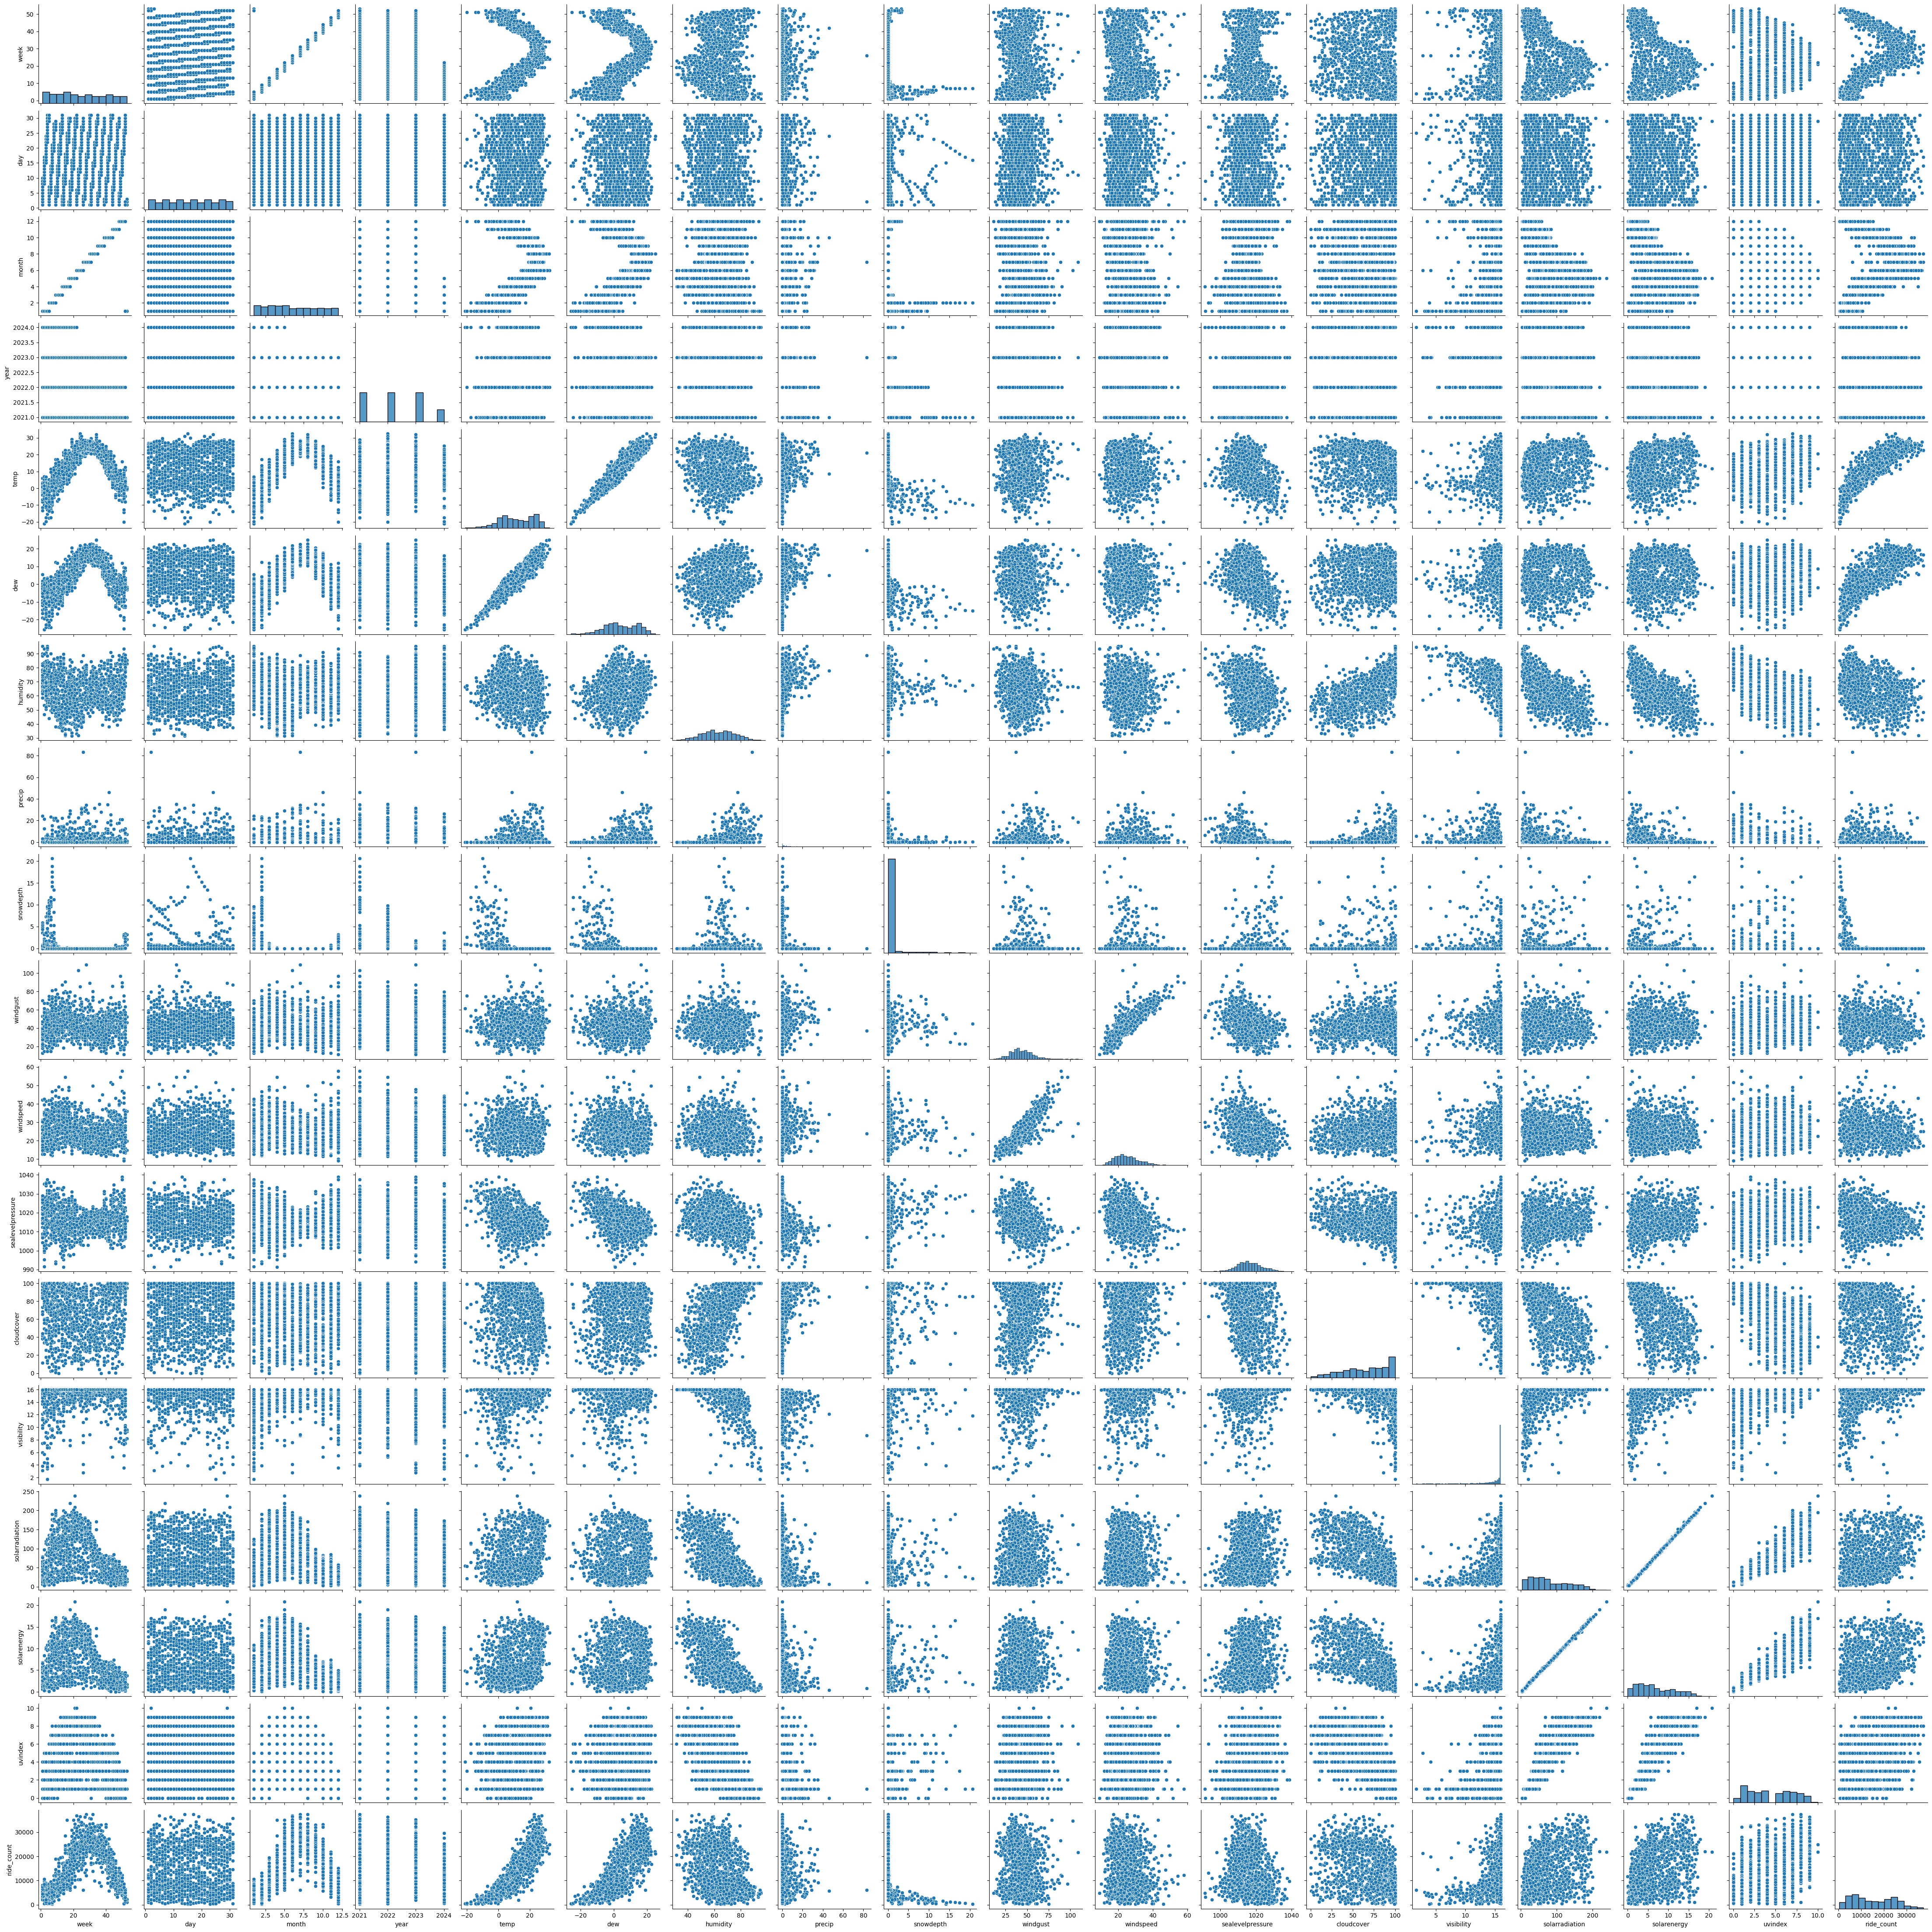

In [8]:
sns.pairplot(divvy_bike_rental_df)
plt.savefig("./result/dataset_pairplot.png")

### 2: Preparing Training and Testing data
After visualising the dataset, let's break down the dataset into 2 types of data: Training and Testing data.

70% - Training Data

30% - Testing Data

In [9]:
X_train, X_test = train_test_split(divvy_bike_rental_df, test_size=0.3, random_state=0)

Check if during the split, there is no data missing

In [10]:
X_train.shape

(872, 18)

In [11]:
X_test.shape

(375, 18)

### 3: Prediction with Autogluon
Now that our training data is ready, let's train our models!

In [12]:
# Presets available in AutoGluon: 'best_quality', 'high_quality', 'medium_quality' 'optimize_for_deployment'
predictor = TabularPredictor(
    label = "ride_count", # For model to focus on which column to predict
    problem_type = 'regression',
    eval_metric = 'r2'
).fit(
    train_data = X_train,
    time_limit = 200,
    presets = "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240622_112118"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.7
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:16:51 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       1.71 GB / 8.00 GB (21.4%)
Disk Space Avail:   71.39 GB / 391.37 GB (18.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_

### 4: Model Evaluation
Let's view the fit summary and the leaderboard from the training.

In [13]:
predictor.fit_summary()
predictor.leaderboard()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3   0.911196          r2       0.847598  4.733800                0.000199           0.031356            3       True         36
1        WeightedEnsemble_L2   0.910125          r2       0.181602  1.086895                0.000196           0.031970            2       True         19
2     ExtraTrees_r178_BAG_L2   0.909832          r2       0.756851  4.307307                0.046078           0.210285            2       True         30
3     ExtraTrees_r172_BAG_L2   0.909456          r2       0.755503  4.283232                0.044730           0.186210            2       True         24
4      ExtraTrees_r42_BAG_L1   0.909435          r2       0.044357  0.188733                0.044357           0.188733            1       True          5
5     Ex

/opt/anaconda3/envs/ml_base/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


model  score_val eval_metric  pred_time_val  fit_time  \
0        WeightedEnsemble_L3   0.911196          r2       0.847598  4.733800   
1        WeightedEnsemble_L2   0.910125          r2       0.181602  1.086895   
2     ExtraTrees_r178_BAG_L2   0.909832          r2       0.756851  4.307307   
3     ExtraTrees_r172_BAG_L2   0.909456          r2       0.755503  4.283232   
4      ExtraTrees_r42_BAG_L1   0.909435          r2       0.044357  0.188733   
5     ExtraTrees_r126_BAG_L2   0.909349          r2       0.757358  4.296878   
6      ExtraTrees_r49_BAG_L2   0.909284          r2       0.756591  4.305949   
7     ExtraTrees_r197_BAG_L2   0.909000          r2       0.757977  4.413943   
8       ExtraTreesMSE_BAG_L2   0.909000          r2       0.759105  4.474478   
9       ExtraTreesMSE_BAG_L1   0.908879          r2       0.046319  0.196750   
10    ExtraTrees_r197_BAG_L1   0.908879          r2       0.047725  0.265145   
11      ExtraTrees_r4_BAG_L2   0.908847          r2       0.752886  4.275789   
12     ExtraTrees_r42_BAG_L2   0.908051          r2       0.757495  4.349705   
13   RandomForest_r34_BAG_L2   0.907097          r2       0.750307  4.347151   
14  RandomForest_r166_BAG_L2   0.906888          r2       0.760009  4.370368   
15     ExtraTrees_r49_BAG_L1   0.906426          r2       0.044607  0.190731   
16   RandomForest_r15_BAG_L2   0.905959          r2       0.753152  4.529377   
17  RandomForest_r127_BAG_L2   0.905543          r2       0.754680  4.588510   
18  RandomForest_r195_BAG_L2   0.904319          r2       0.760718  4.666785   
19   RandomForest_r16_BAG_L2   0.904187          r2       0.757383  4.829055   
20    RandomForestMSE_BAG_L2   0.904187          r2       0.757590  4.766465   
21    ExtraTrees_r172_BAG_L1   0.904151          r2       0.040475  0.157959   
22   RandomForest_r39_BAG_L2   0.903987          r2       0.756068  4.550126   
23  RandomForest_r166_BAG_L1   0.903478          r2       0.046368  0.281710   
24    ExtraTrees_r178_BAG_L1   0.902931          r2       0.044394  0.203587   
25    RandomForestMSE_BAG_L1   0.901684          r2       0.045346  0.357597   
26   RandomForest_r16_BAG_L1   0.901684          r2       0.046123  0.478711   
27    ExtraTrees_r126_BAG_L1   0.901453          r2       0.042713  0.248662   
28  RandomForest_r195_BAG_L1   0.901147          r2       0.043845  0.307340   
29   RandomForest_r15_BAG_L1   0.900389          r2       0.044183  0.291459   
30   RandomForest_r39_BAG_L1   0.900361          r2       0.045180  0.271214   
31  RandomForest_r127_BAG_L1   0.897697          r2       0.040585  0.289862   
32      ExtraTrees_r4_BAG_L1   0.878717          r2       0.041522  0.181192   
33   RandomForest_r34_BAG_L1   0.864926          r2       0.039835  0.181975   
34     KNeighborsDist_BAG_L1   0.825139          r2       0.003339  0.001320   
35     KNeighborsUnif_BAG_L1   0.820843          r2       0.003857  0.003075   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000199           0.031356            3       True   
1                 0.000196           0.031970            2       True   
2                 0.046078           0.210285            2       True   
3                 0.044730           0.186210            2       True   
4                 0.044357           0.188733            1       True   
5                 0.046585           0.199856            2       True   
6                 0.045818           0.208928            2       True   
7                 0.047204           0.316921            2       True   
8                 0.048332           0.377456            2       True   
9                 0.046319           0.196750            1       True   
10                0.047725           0.265145            1       True   
11                0.042113           0.178767            2       True   
12                0.046722           0.252683            2       True   
13                0.039534           0.2

We'll plot a graph for a better view of the statistics.

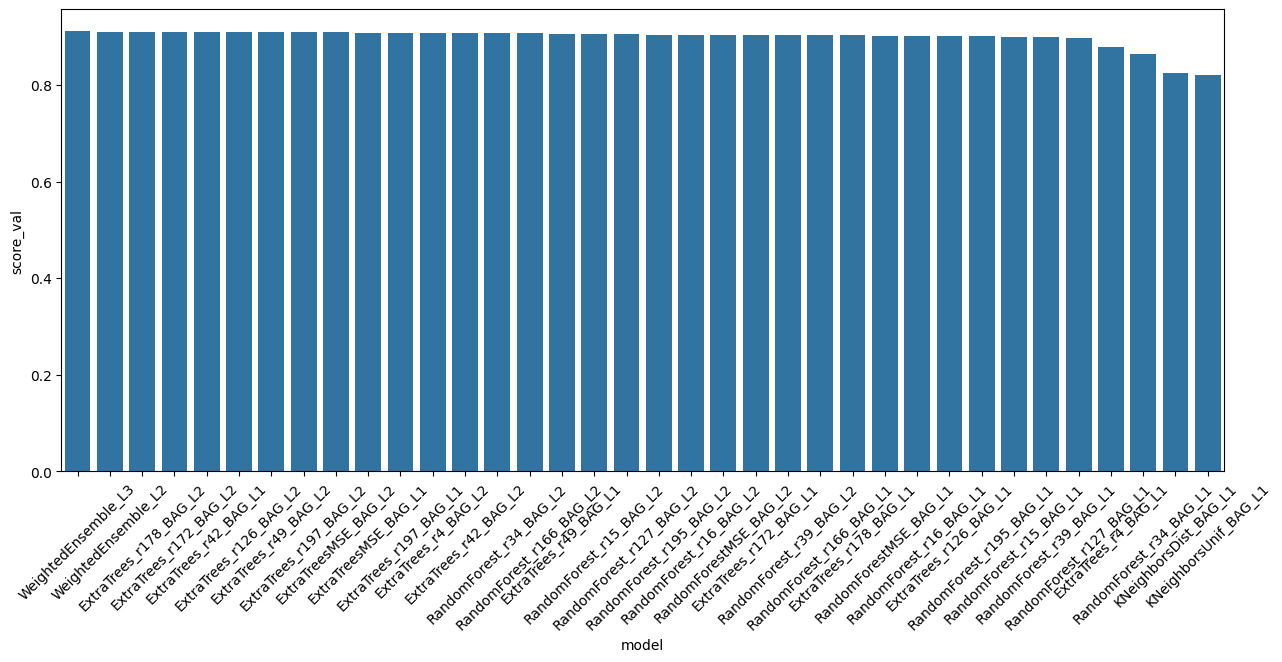

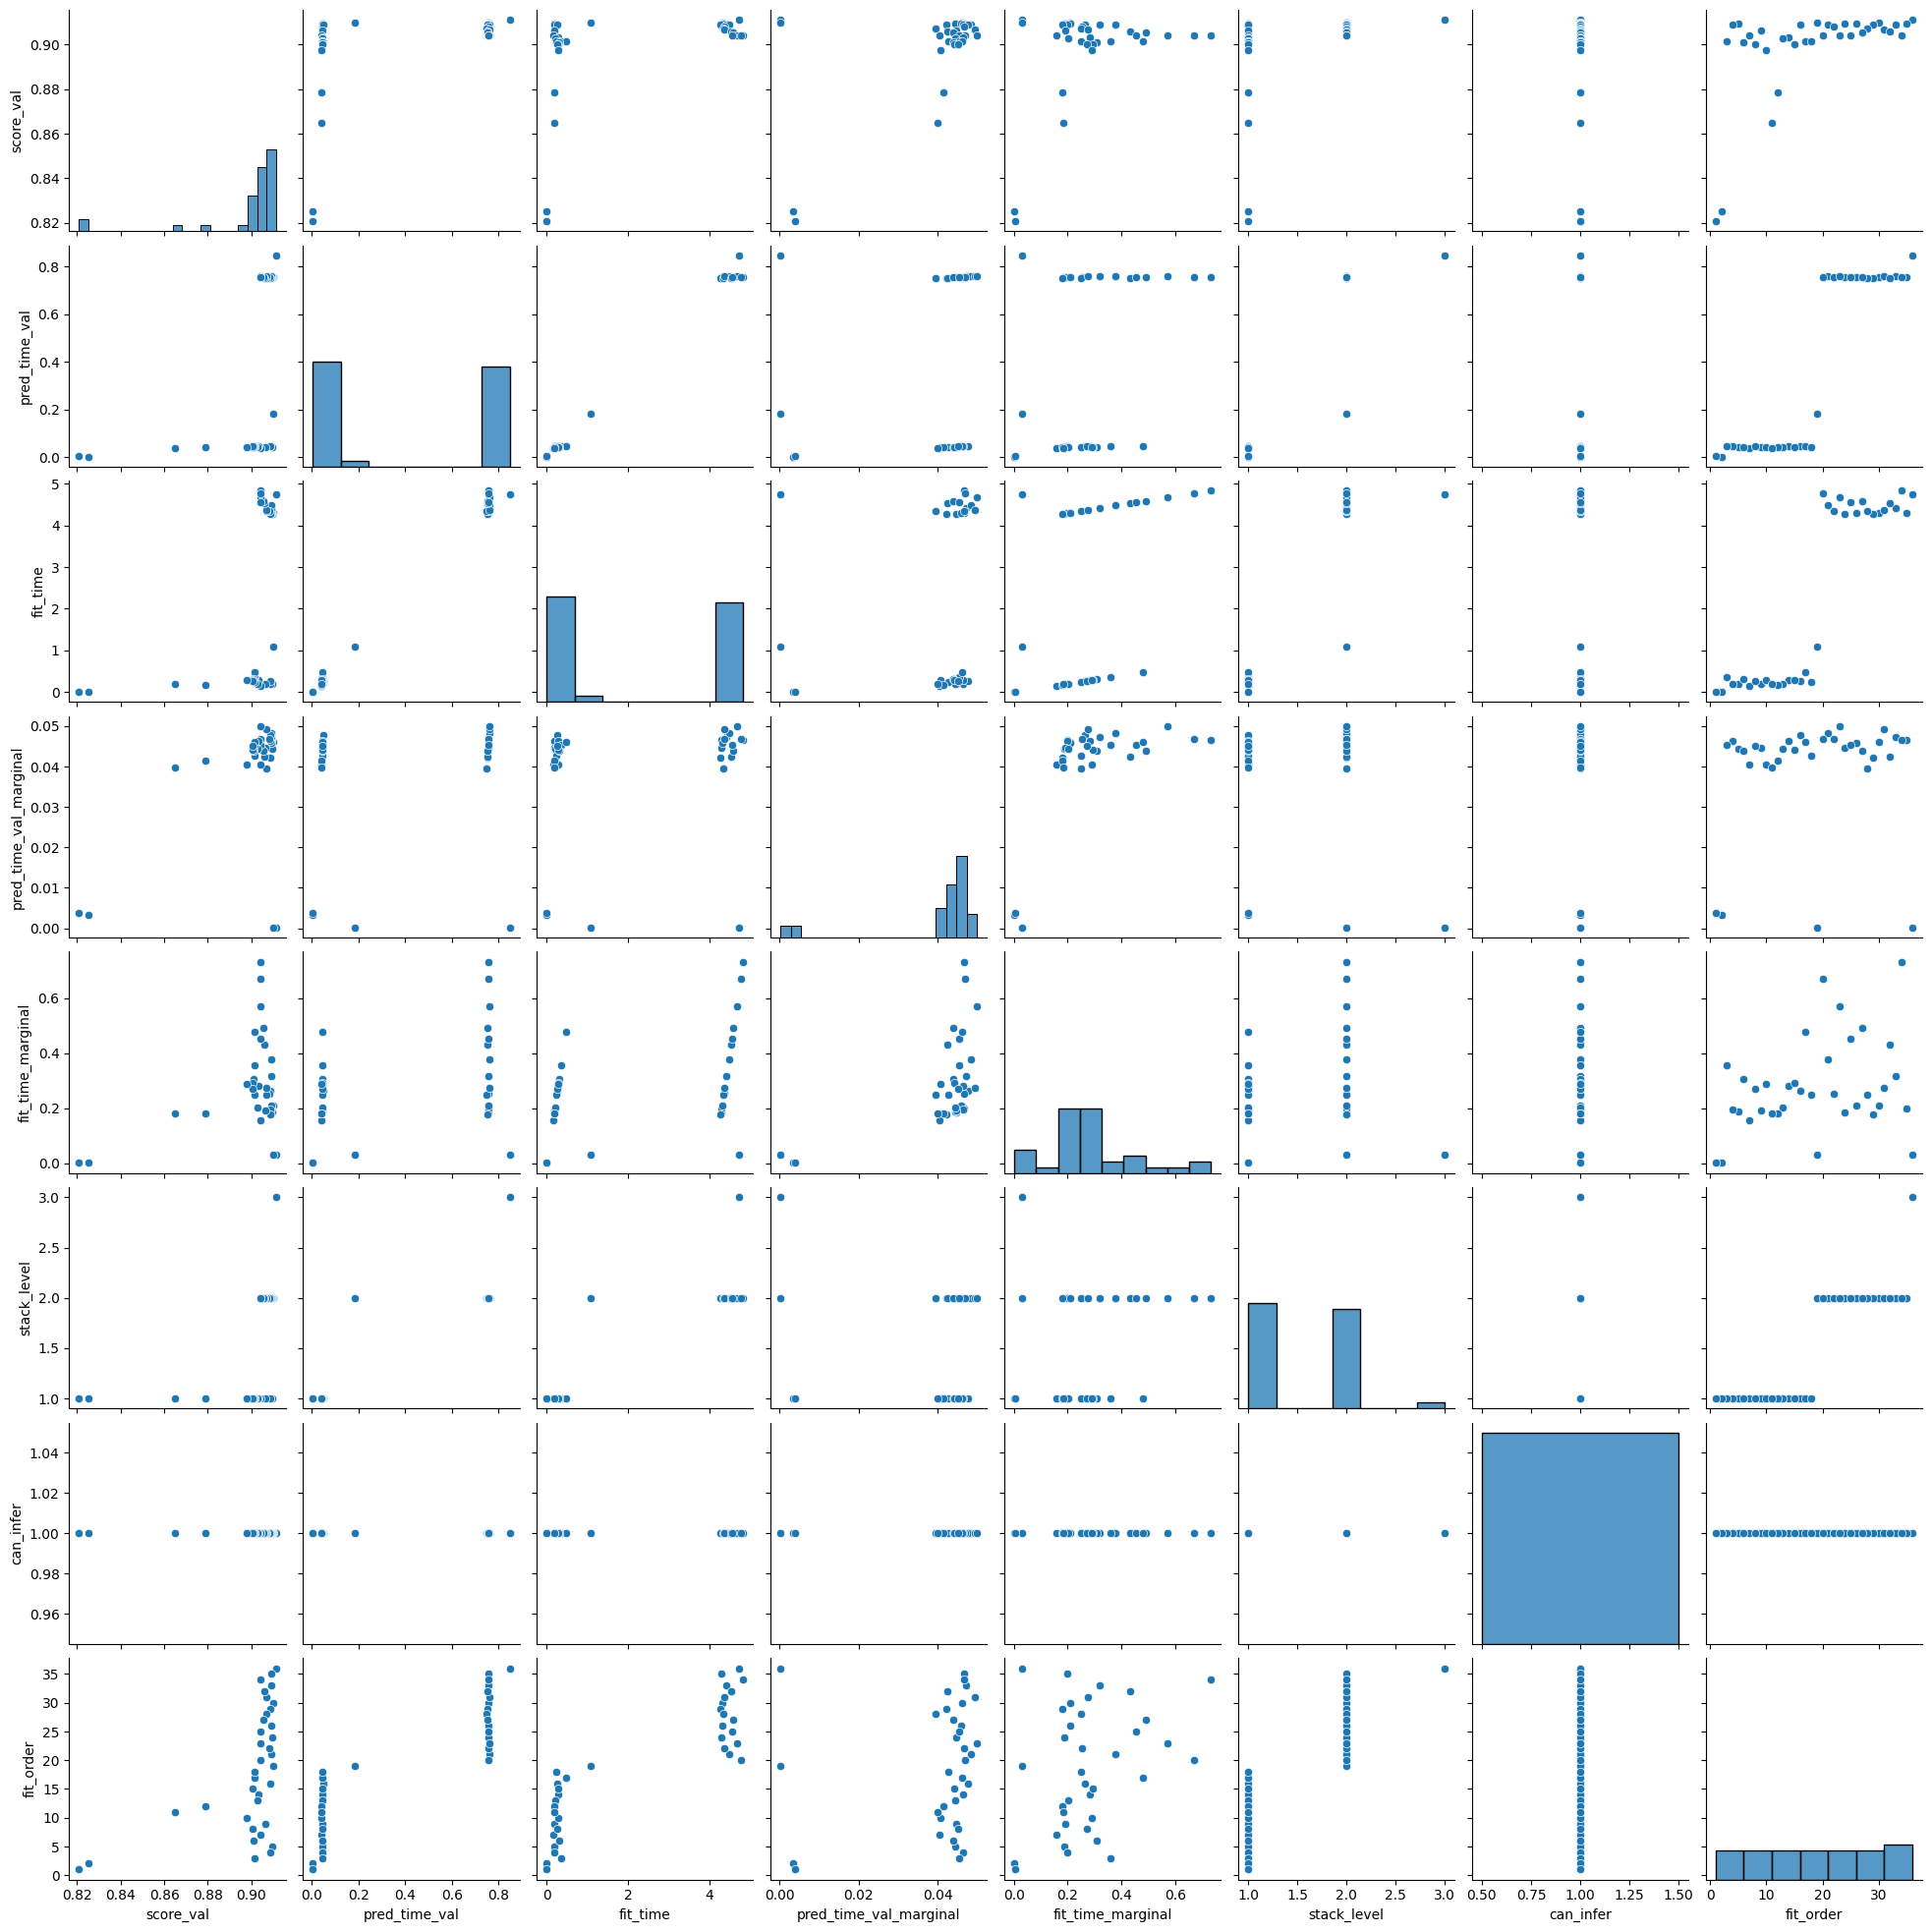

In [14]:
# Plot both bar graphs and pair plots
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard())
plt.xticks(rotation=45);
plt.savefig("./result/models_leaderboard.png")

sns.pairplot(predictor.leaderboard())

Let's see how our model performs!

Root Mean Squared Error :  2808.37
Mean Squared Error :  7886939.870796208
Mean Absolute Error :  1969.4602475585937
Normal R2 Score:  0.9041181184625474
Adjusted R2 Score:  0.8992701581600919


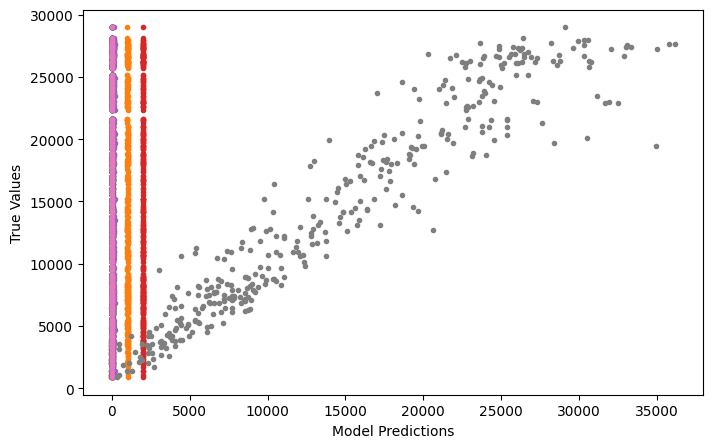

In [15]:
y_predict = predictor.predict(X_test)
y_test = X_test['ride_count']
k = X_test.shape[1]
n = len(X_test)


rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
normal_r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - normal_r2) * (n - 1) / (n - k - 1)

print("Root Mean Squared Error : ", rmse)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)
print("Normal R2 Score: ", normal_r2)
print("Adjusted R2 Score: ", adj_r2)

plt.figure(figsize = (8, 5))
plt.plot(X_test, y_predict, ".")
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.savefig("./result/prediction_test_result.png")

### 5: Testing the model
We're going to input some data for the model to predict.

When we previously get all the columns, we get this result:
```
Index(['week', 'day', 'month', 'year', 'temp', 'dew', 'humidity', 'precip',
       'snowdepth', 'windgust', 'windspeed', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'ride_count'],
      dtype='object')
```
Ignoring ride_count, the rest of the features are what we need to key in.

In [17]:
from autogluon.tabular import TabularDataset

date = datetime.today()

"""
======================
Variable Configuration
======================
"""
# Temperature (°F)
temp: float = 30
# Dew Point (°F)
dew: float = 0
# Humidity (0-100%)
humidity: float = 0
# Precipitation (inches)
precip: float = 0
# Snow Depth (inches)
snowdepth: float = 0
# Wind Gust (mph)
windgust: float = 0
# Wind Speed (mph)
windspeed: float = 0
# Sea Level Pressure (mb)
sealevelpressure: float = 0
# Cloud Cover (%)
cloudcover: float = 0
# Visibility (miles)
visibility: float = 0
# Solar Radiation (W/m^2)
solarradiation: float = 0
# Solar Energy (MJ/m^2)
solarenergy: float = 0
# UV index
uvindex: float = 0

test_prediction_df = pd.DataFrame(
    [[
        date.isocalendar().week, date.day, date.month, date.year, temp,
        dew, humidity, precip, snowdepth, windgust,
        windspeed, sealevelpressure, cloudcover, visibility, solarradiation,
        solarenergy, uvindex
    ]],
    columns = [
        'week', 'day', 'month', 'year', 'temp',
        'dew', 'humidity', 'precip', 'snowdepth', 'windgust',
        'windspeed', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
        'solarenergy', 'uvindex'
    ]
)

# Predicting today's ride_count
ride_count = predictor.predict(test_prediction_df)
print(f"The ride count for the date {date.year:04d}-{date.month:02d}-{date.day:02d} is: {ride_count[0]:.0f}")

The ride count for the date 2024-06-22 is: 21309


### End of project